In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import json
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv('/content/drive/My Drive/Proyecto Final Henry/df_final.csv')

In [ ]:
df.head(1)

,business_id,business_name,address,city,state,latitude,longitude,stars_business,review_count,categories,user_id,stars_by_user,text,date,user_name,average_stars,attributes
0,n7AQvGvNHlmun3kqXeBKVQ,Roy's Appliance Service,NaN,Meridian,Florida,43.643494,-116.436,5.0,5,"Local Services, Appliances & Repair",9drwrG9N1ynDAajJSTzDhw,5.0,"I had an issue with my washing machine, and sc...",2019-04-24,Corey,4.83,['BusinessAcceptsCreditCards']


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 939069 entries, 0 to 939068
Data columns (total 17 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   business_id     939069 non-null  object 
 1   business_name   939069 non-null  object 
 2   address         853963 non-null  object 
 3   city            880207 non-null  object 
 4   state           939069 non-null  object 
 5   latitude        939069 non-null  float64
 6   longitude       939069 non-null  float64
 7   stars_business  156151 non-null  float64
 8   review_count    939069 non-null  int64  
 9   categories      939069 non-null  object 
 10  user_id         939069 non-null  object 
 11  stars_by_user   939069 non-null  float64
 12  text            698260 non-null  object 
 13  date            939069 non-null  object 
 14  user_name       939058 non-null  object 
 15  average_stars   939063 non-null  float64
 16  attributes      704098 non-null  object 
dtypes: float64

In [ ]:
df['text'].fillna('sin información', inplace=True)


Análisis de sentimiento en reseñas

In [ ]:
from textblob import TextBlob

def analizar_sentimiento(texto):
    if isinstance(texto, str):
        testimonio = TextBlob(texto)
        polaridad = testimonio.sentiment.polarity
        if polaridad > 0:
            return 'Positiva'
        elif polaridad < 0:
            return 'Negativa'
        else:
            return 'Neutral'
    else:
        return 'No es un testimonio válido'

df['sentimiento'] = df['text'].apply(analizar_sentimiento)

In [ ]:
filtrados = df[df['sentimiento'] == 'No es un testimonio válido']
cantidad_invalidos = len(filtrados)
print("La cantidad de 'No es un testimonio válido' es:", cantidad_invalidos)

La cantidad de 'No es un testimonio válido' es: 0


In [ ]:
df.head(3)

,business_id,business_name,address,city,state,latitude,longitude,stars_business,review_count,categories,user_id,stars_by_user,text,date,user_name,average_stars,attributes,sentimiento
0,n7AQvGvNHlmun3kqXeBKVQ,Roy's Appliance Service,NaN,Meridian,Florida,43.643494,-116.436,5.0,5,"Local Services, Appliances & Repair",9drwrG9N1ynDAajJSTzDhw,5.0,"I had an issue with my washing machine, and sc...",2019-04-24,Corey,4.83,['BusinessAcceptsCreditCards'],Positiva
1,n7AQvGvNHlmun3kqXeBKVQ,Roy's Appliance Service,NaN,Meridian,Florida,43.643494,-116.436,5.0,5,"Local Services, Appliances & Repair",CaPqQ3O4rCQ7ynslyvvaNw,5.0,Very convenient to schedule online. Day before...,2019-10-31,Donald,3.58,['BusinessAcceptsCreditCards'],Positiva
2,n7AQvGvNHlmun3kqXeBKVQ,Roy's Appliance Service,NaN,Meridian,Florida,43.643494,-116.436,5.0,5,"Local Services, Appliances & Repair",GdozhXJo-ZI1p7RV0Duovg,5.0,Terry Lugar responded promptly and arrived pre...,2017-04-21,Ken,5.00,['BusinessAcceptsCreditCards'],Positiva


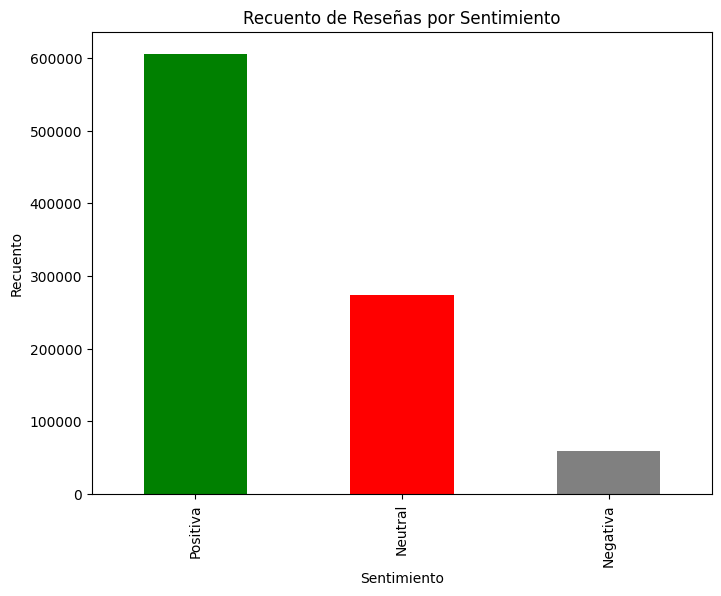

In [ ]:
conteo_sentimiento = df['sentimiento'].value_counts()

plt.figure(figsize=(8, 6))
conteo_sentimiento.plot(kind='bar', color=['green', 'red', 'gray'])
plt.title('Recuento de Reseñas por Sentimiento')
plt.xlabel('Sentimiento')
plt.ylabel('Recuento')
plt.show()


In [ ]:
df['date'] = pd.to_datetime(df['date'])


In [ ]:
df['año'] = df['date'].dt.year


Análisis de sentimiento por año

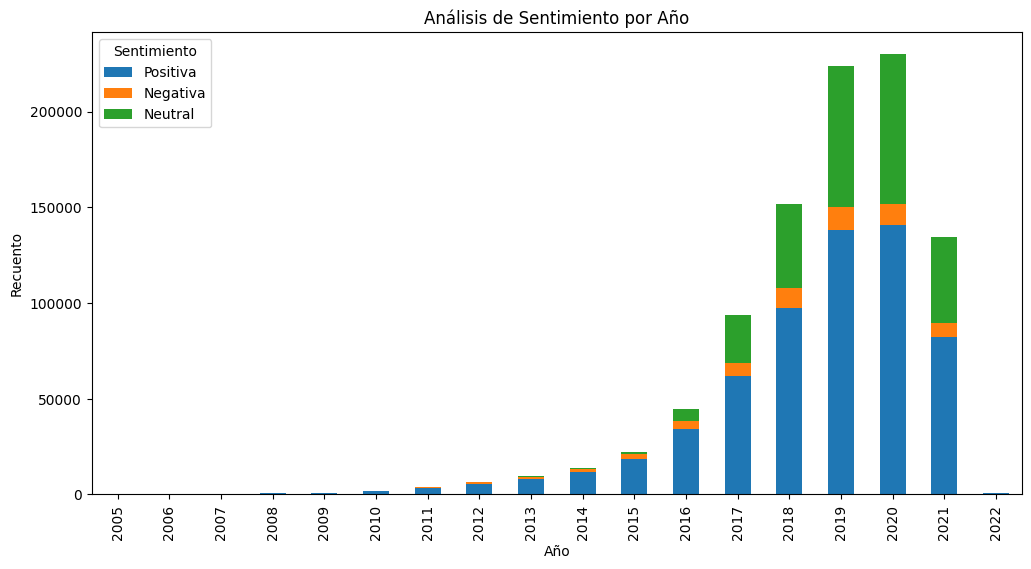

In [ ]:
analisis_por_año = df.groupby('año')['sentimiento'].apply(lambda x: x.value_counts().to_dict()).unstack().fillna(0)

analisis_por_año.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Análisis de Sentimiento por Año')
plt.xlabel('Año')
plt.ylabel('Recuento')
plt.legend(title='Sentimiento')
plt.show()



Estados con el promedio de caliicacion mas alta

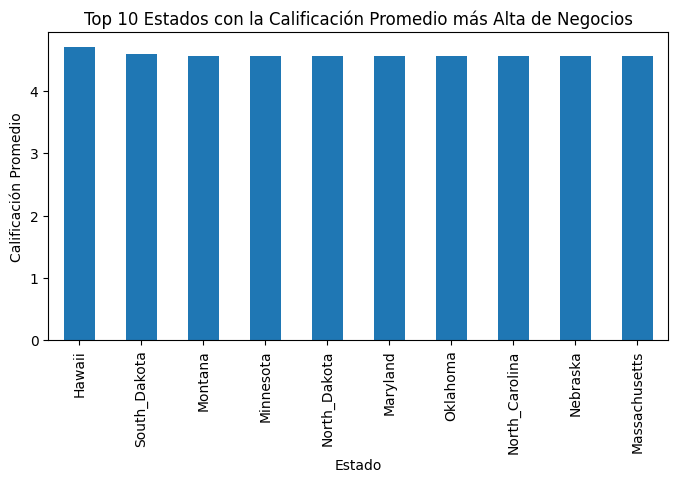

In [ ]:
calificacion_promedio_por_estado = df.groupby('state')['average_stars'].mean()

calificacion_promedio_por_estado = calificacion_promedio_por_estado.sort_values(ascending=False)
top_10_estados = calificacion_promedio_por_estado.head(10)

plt.figure(figsize=(8, 4))
top_10_estados.plot(kind='bar')
plt.title('Top 10 Estados con la Calificación Promedio más Alta de Negocios')
plt.xlabel('Estado')
plt.ylabel('Calificación Promedio')
plt.show()


In [ ]:
conteo_ciudades = df['city'].value_counts()
print(conteo_ciudades)


Philadelphia    19022
Tucson          18784
Reno            12577
Tampa           12456
Indianapolis    11463
                ...  
NASHVILLE           5
Erial               5
Godfrey             3
elmwood             3
O'fallon            1
Name: city, Length: 5199, dtype: int64


Cuidades con mas negocios

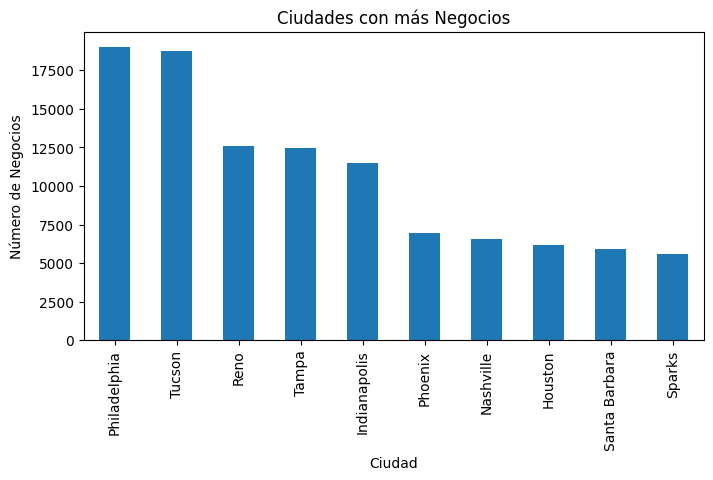

In [ ]:
conteo_ciudades = df['city'].value_counts()

ciudades_con_mas_negocios = conteo_ciudades.sort_values(ascending=False)
n_ciudades = 10

plt.figure(figsize=(8, 4))
ciudades_con_mas_negocios.head(n_ciudades).plot(kind='bar')
plt.title('Ciudades con más Negocios')
plt.xlabel('Ciudad')
plt.ylabel('Número de Negocios')
plt.show()

Palabras mas comunes en los atributos

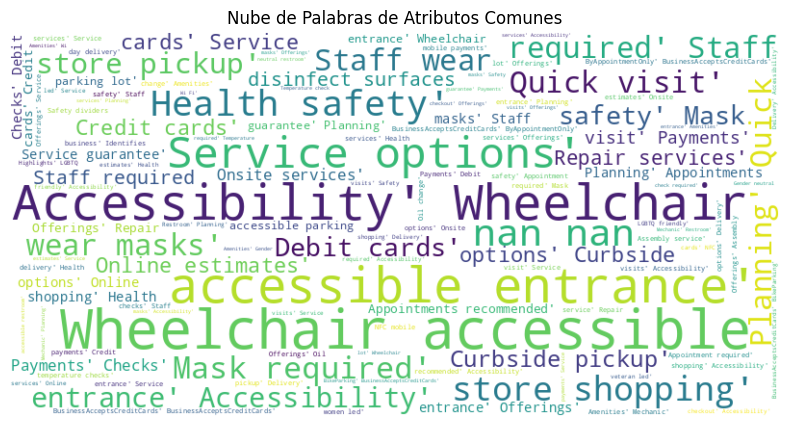

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

atributos_texto = ' '.join(str(attr) for attr in df['attributes'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(atributos_texto)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de Palabras de Atributos Comunes')
plt.show()


In [ ]:
palabras_frecuencias = wordcloud.words_
lista_palabras_frecuencias = list(palabras_frecuencias.items())
lista_palabras_frecuencias.sort(key=lambda x: x[1], reverse=True)

palabras_comunes = lista_palabras_frecuencias[:10]

for palabra, frecuencia in palabras_comunes:
    print(f'{palabra}: {frecuencia}')

Wheelchair accessible: 1.0
Accessibility' Wheelchair: 0.831422747153912
accessible entrance': 0.8238559022929233
Service options': 0.633897529835271
nan nan: 0.5002517883570425
Health safety': 0.41818197811090563
store shopping': 0.37853575724523747
Mask required': 0.3040173986854229
required' Staff: 0.27639984430903336
Staff wear: 0.2751442010612494


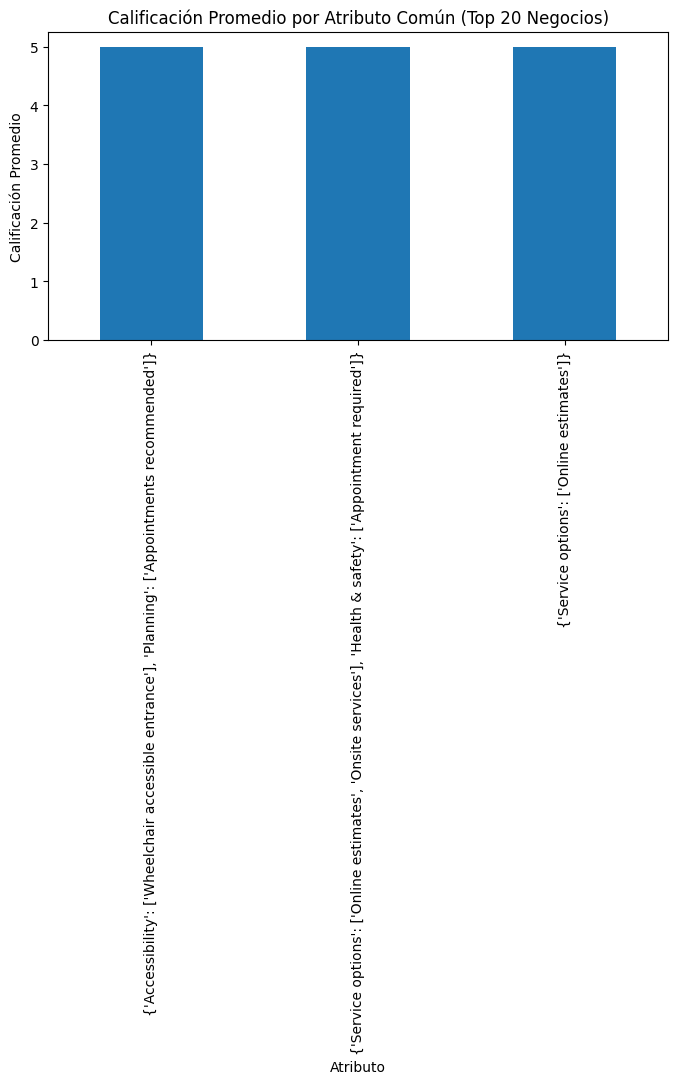

In [ ]:
atributos_comunes = ["Wheelchair accessible", "Accessibility' Wheelchair", "accessible entrance'", "Service options'", "Health safety'","store shopping","Mask required", "required' Staff","Staff wear"]

df_con_atributos_comunes = df[df['attributes'].apply(lambda x: isinstance(x, str) and any(atributo in x for atributo in atributos_comunes))]

calificacion_promedio = df_con_atributos_comunes['average_stars']
df_con_atributos_comunes = df_con_atributos_comunes.sort_values(by='average_stars', ascending=False)
df_top_20 = df_con_atributos_comunes.head(20)

plt.figure(figsize=(8, 4))
df_top_20.groupby('attributes')['average_stars'].mean().plot(kind='bar')
plt.title('Calificación Promedio por Atributo Común (Top 20 Negocios)')
plt.xlabel('Atributo')
plt.ylabel('Calificación Promedio')
plt.show()

